LEVEL 12 — DATABASE

A database is just permanent storage.

If Python program stops:
- variables are lost ❌
- database keeps data ✅

i am learning logic, i will simulate a database using python dictionaries.

LEVEL 12.1 — Fake Database (Very Simple)

In [ ]:
class Database:
    def __init__(self):
        self.users = {}
        self.restaurants = {}
        self.orders = {}

Think like tables:

- users table
- restaurants table
- orders table

LEVEL 12.2 — Saving Data to Database

In [ ]:
db = Database()

db.users[1] = user1
db.restaurants[1] = rest
db.orders[1] = order1

Meaning:

- key = primary key
- value = object

This is how real DB works internally.

LEVEL 13 — ORDER STATUS (VERY IMPORTANT)

Orders change state over time.

Real Swiggy order states:
- CREATED
- CONFIRMED
- PREPARING
- OUT_FOR_DELIVERY
- DELIVERED

LEVEL 13.1 — Status Change Logic

In [ ]:
class OrderStatus:
    CREATED = "CREATED"
    CONFIRMED = "CONFIRMED"
    PREPARING = "PREPARING"
    OUT_FOR_DELIVERY = "OUT_FOR_DELIVERY"
    DELIVERED = "DELIVERED"

LEVEL 13.2 — Update Order Status Safely

In [ ]:
def update_status(order, new_status):
    print(f"Order {order.order_id}: {order.status} → {new_status}")
    order.status = new_status

SYSTEM DESIGN WORD

➡️ State Machine
(order can only move forward)

LEVEL 14 — DELIVERY PARTNER

What is a delivery partner?

Just a person who can deliver one order at a time.

LEVEL 14.1 — Delivery Partner Class

In [ ]:
class DeliveryPartner:
    def __init__(self, partner_id, name):
        self.partner_id = partner_id
        self.name = name
        self.available = True

LEVEL 14.2 — Assign Partner

In [ ]:
def assign_partner(order, partners):
    for partner in partners:
        if partner.available:
            partner.available = False
            update_status(order, OrderStatus.OUT_FOR_DELIVERY)
            print(f"{partner.name} assigned")
            return partner

    print("No delivery partner available")
    return None

LEVEL 15 — COMPLETE ORDER FLOW (END-TO-END)

This is VERY IMPORTANT.

Read line by line.

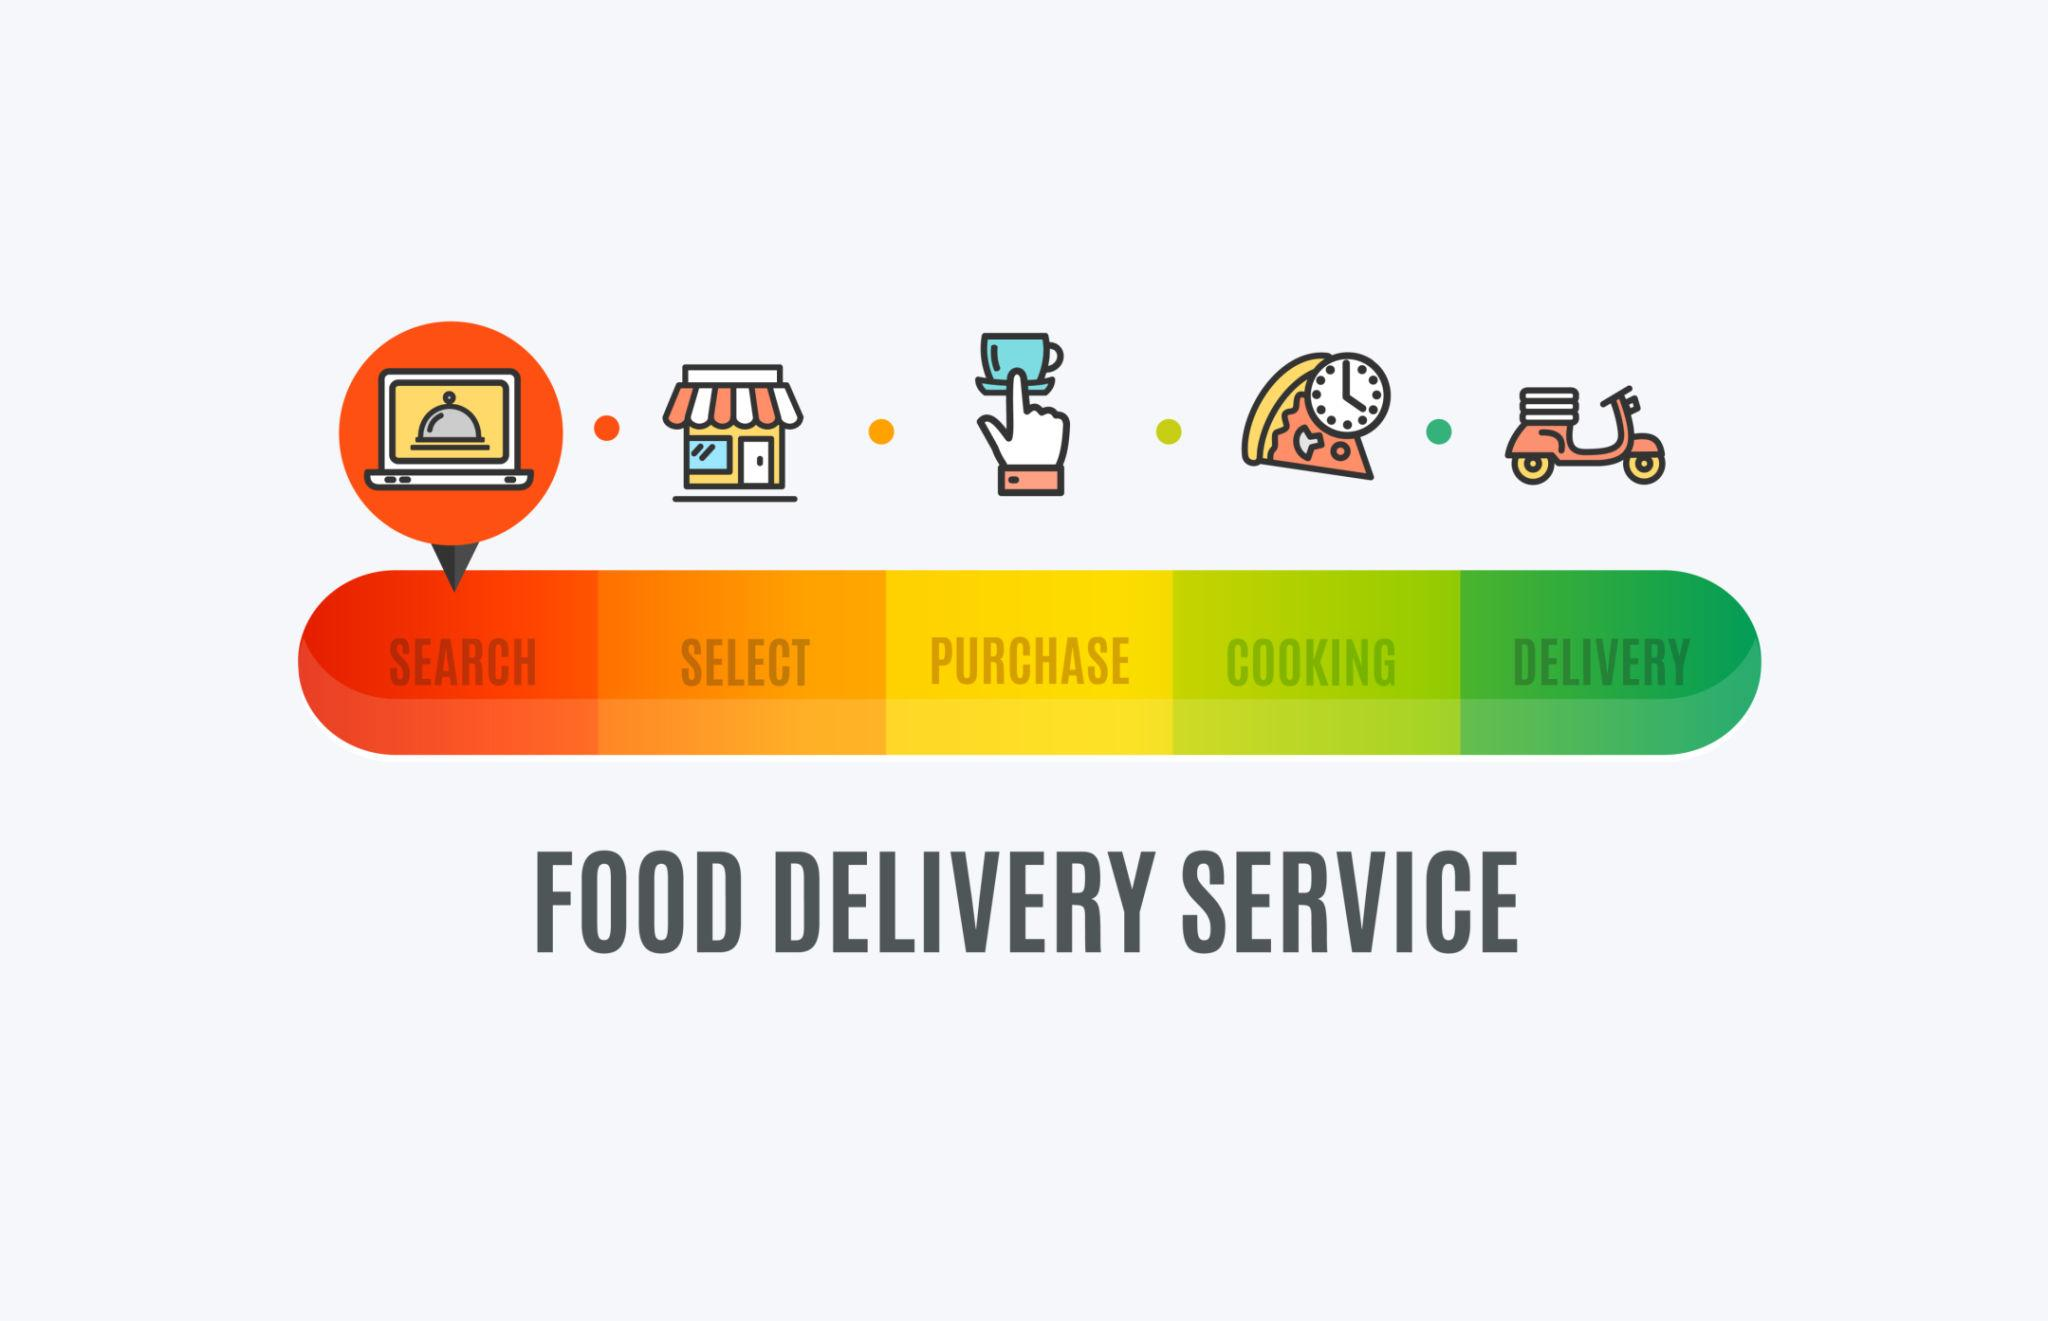
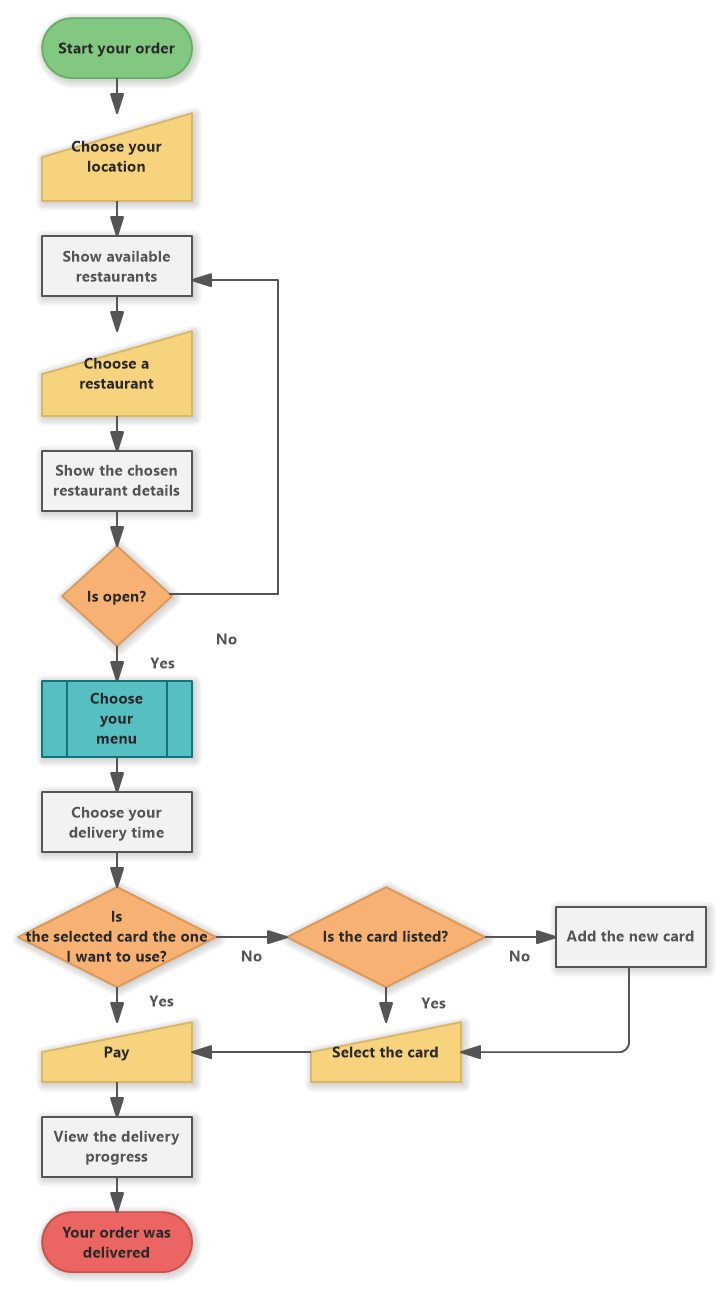

LEVEL 15.1 — Full Flow Code

In [ ]:
# create user
user = User(1, "Priyanshu")

# create restaurant
pizza = Food("Pizza", 250)
rest = Restaurant("Dominos")
rest.add_food(pizza)

# services
order_service = OrderService()
queue = Queue()

# place order
order = order_service.place_order(user, rest, [pizza])
queue.push(order)

# process order
o = queue.pop()
update_status(o, OrderStatus.CONFIRMED)
update_status(o, OrderStatus.PREPARING)

# delivery
partners = [DeliveryPartner(1, "Ravi")]
assign_partner(o, partners)

update_status(o, OrderStatus.DELIVERED)

a real backend flow

this is exactly how swiggy/zomato works internally.

LEVEL 16 — FAILURE HANDLING (ADVANCED)

Problem:
- What if order processing fails?

Solution:
- Retry
- Don’t lose order

LEVEL 16.1 — Retry Logic

In [ ]:
def process_with_retry(order, retries=3):
    for i in range(retries):
        try:
            print("Processing order", order.order_id)
            if i < 2:
                raise Exception("Temporary failure")
            update_status(order, OrderStatus.CONFIRMED)
            return
        except:
            print("Retrying...")

SYSTEM DESIGN WORD

➡️ Retry mechanism

LEVEL 17 — SCALING (CONCEPT ONLY)

Now imagine:
- 1 million users
- 100k orders/min

What we already added helps:
- Cache → speed
- Queue → async
- Load balancer → traffic split
- Rate limiter → protection

This is SCALABLE SYSTEM.

now i understand:

- Backend logic
- System design basics
- Real food delivery flow
- Python-based implementation
- Interview-ready concepts